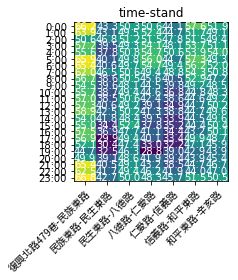

In [6]:
import numpy as np
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from IPython.display import Image

scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']
credentials = ServiceAccountCredentials.from_json_keyfile_name('C:\\Users\\j8862\\OneDrive\\Desktop\\datascience\\googlesheet.json', scope)
gc = gspread.authorize(credentials)
# Open a worksheet from spreadsheet with one shot
sh = gc.open_by_url('https://docs.google.com/spreadsheets/d/1FJPf9S2vpimDZvefrpnfq31cq3JpmySHse74WQoEgu4/edit?ts=5c8895e5#gid=618695640')
wks4 = sh.worksheet("暫時的工作表")

# sphinx_gallery_thumbnail_number = 2
time = wks4.col_values(3)
stand = wks4.row_values(3)
stand.pop(0)
stand.pop(0)
stand.pop(0)
time.pop(0)
time.pop(0)
time.pop(0)
timex=[]
timex2=[]
for j in range(1,len(time),4):
    timex.append(time[j-1].split('~'))
for k in range(len(timex)):
    timex2.append(timex[k][0])
#print(timex2)
yaxis = timex2
xaxis = stand


speed=[]
a=[]
b=[]

for i in range(0,len(time),4):
    a=wks4.row_values(i+4)
    a.pop(0)
    a.pop(0)
    a.pop(0)
    a = list(map(float, a))
    speed.append(a)



fig, ax = plt.subplots()
im = ax.imshow(speed2)
#plt.pcolor(cmap='YIOrRd')
fontPath = r'C:\\Users\\j8862\\OneDrive\\Desktop\\datascience\\NotoSansCJKtc-Regular.otf'
font30 = fm.FontProperties(fname=fontPath, size=10)

# We want to show all ticks...
ax.set_xticks(np.arange(len(xaxis)))
ax.set_yticks(np.arange(len(yaxis)))
ax.set_aspect(0.3)
# ... and label them with the respective list entries
ax.set_xticklabels(xaxis)
ax.set_yticklabels(yaxis)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor",fontproperties=font30)

# Loop over data dimensions and create text annotations.
for i in range(len(yaxis)):
    for j in range(len(xaxis)):
        text = ax.text(j, i, speed[i][j],
                       ha="center", va="center", color="w")

ax.set_title("time-stand")
fig.tight_layout()
fig.savefig('heat.png')
plt.show()
